In [81]:
import pandas as pd
from io import StringIO
pd.set_option('display.max_columns', None)

In [82]:
#Import dataframe
df_reb_eda = pd.read_csv('/Users/pandit1781/NEAT-Scouting-Data-Analytics/rebounding_eda/nba_rebounding_clean.csv', low_memory=False)

In [83]:
# Converter function for height 
def feet_to_meters(height):
    if isinstance(height, str):
        feet, inches = map(int, height.split('-'))
        total_feet = feet + inches / 12  # Convert inches to feet
        total_meters = total_feet * 0.3048  # Convert feet to meters
        return round(total_meters, 2)  # Round to 2 decimals
    else:
        return None  # Handle missing or invalid values

In [84]:
# Apply the function to convert heights
df_reb_eda['PLAYER_HEIGHT_METERS'] = df_reb_eda['HEIGHT'].apply(feet_to_meters)

In [85]:
df_reb_eda.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,OREB,OREB_CONTEST,OREB_UNCONTEST,OREB_CONTEST_PCT,DREB,DREB_CONTEST,DREB_UNCONTEST,DREB_CONTEST_PCT,DREB_CHANCES,REB,REB_CONTEST,REB_UNCONTEST,REB_CONTEST_PCT,PLAYER_HEIGHT_METERS
0,965,Derek Fisher,1610612760,OKC,39.0,19,10,9,0.526,49.5,3.8,12.1,0.315,2.0,6.8,0.293,2.5,2.5,1.000,2.6,1.0,2.1,0.0,0.2,4.5,3.8,12.1,2013-14,Playoffs,Arkansas-Little Rock,USA,1996,1,24,6,G,6-1,210.0,1996,2013,6,2,4,0.333,27,1,24,0.037,38,33,3,28,0.091,1.85
1,979,Jermaine O'Neal,1610612744,GSW,35.0,7,3,4,0.429,49.0,10.5,18.7,0.563,0.0,0.0,0.000,3.5,4.7,0.750,0.6,2.3,0.6,1.8,1.2,7.0,5.8,24.6,2013-14,Playoffs,NaN,USA,1996,1,17,7,C,6-11,255.0,1996,2013,12,6,6,0.500,12,4,7,0.333,31,24,10,13,0.417,2.11
2,708,Kevin Garnett,1610612751,BKN,38.0,12,5,7,0.417,53.8,7.1,13.6,0.524,0.0,0.4,0.000,3.7,5.0,0.739,3.4,2.8,1.9,1.1,0.4,5.4,4.5,17.9,2013-14,Playoffs,NaN,USA,1995,1,5,21,F,6-11,240.0,1995,2015,19,11,8,0.579,57,26,31,0.456,88,76,37,39,0.487,2.11
3,951,Ray Allen,1610612748,MIA,38.0,20,13,7,0.650,55.5,6.2,15.0,0.413,3.5,8.9,0.388,3.6,3.9,0.919,3.4,2.5,1.5,0.4,0.4,4.3,3.2,19.5,2013-14,Playoffs,Connecticut,USA,1996,1,5,34,G,6-5,205.0,1996,2013,13,6,7,0.462,54,7,47,0.130,94,67,13,54,0.194,1.96
4,1495,Tim Duncan,1610612759,SAS,38.0,23,16,7,0.696,51.4,10.2,19.5,0.523,0.0,0.1,0.000,5.2,6.8,0.760,3.1,1.8,0.5,2.0,1.4,3.5,6.0,25.5,2013-14,Playoffs,Wake Forest,US Virgin Islands,1997,1,1,21,C,6-11,250.0,1997,2015,65,47,16,0.723,146,53,90,0.363,282,211,100,106,0.474,2.11


In [86]:
# European countries in wider basketball sense:
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'North Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [87]:
# Define function for European countries
def filter_europe(df, column_name, europe):
    return df[df[column_name].isin(europe)]

In [88]:
# New object for European players playing at C:
europe_C_reb = filter_europe(df_reb_eda, 'COUNTRY', europe)
europe_C_reb = europe_C_reb.loc[europe_C_reb['POSITION'].isin(['C'])]

In [89]:
# Check number of entries for Europe
europe_C_reb.shape

(95, 54)

In [90]:
# Define function for non-european countries
def filter_non_europe(df, column_name='COUNTRY', country_list=europe):
    return df[~df[column_name].isin(europe)]

In [91]:
# New object for Non-europe players playing at F in regular season games
non_europe_C_reb = filter_non_europe(df_reb_eda)
non_europe_C_reb = non_europe_C_reb.loc[non_europe_C_reb['POSITION'].isin(['C'])]

In [92]:
# Check number of entries for Non-Europe
non_europe_C_reb.shape

(213, 54)

In [93]:
# Check number of unique European Centers
europe_C_reb.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
C    27
Name: PLAYER_ID, dtype: int64

In [94]:
# Check number of unique Non-European Centers
non_europe_C_reb.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
C    78
Name: PLAYER_ID, dtype: int64

In [95]:
# Checking for anomalies via comparing AVG metrics between Europeans and Non-Europeans:

import altair as alt
import pandas as pd
import altair_saver

# Add a new column to show whether European or Non-European
europe_C_reb['Europe'] = 'European'
non_europe_C_reb['Europe'] = 'Non-European'

# Combine both dataframes
combined_df = pd.concat([europe_C_reb, non_europe_C_reb])

# List of metrics to be plotted
metrics = ['OREB', 'OREB_CONTEST',	'OREB_UNCONTEST', 'OREB_CONTEST_PCT', 'DREB', 'DREB_CONTEST',	
           'DREB_UNCONTEST', 'DREB_CONTEST_PCT', 'REB' , 'REB_CONTEST',	'REB_UNCONTEST',
            'REB_CONTEST_PCT', 'PLAYER_HEIGHT_METERS']

# A list to save the plots 
charts = []

sampled_df = combined_df.sample(frac=0.5) 

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'median({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'))
    ).properties(
        title=f'Average {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
alt_row


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].a

alt.VConcatChart(...)

In [96]:
# Create a heatmap for CORR between different metrics
import altair as alt
import pandas as pd

# Select the columns you want to check for correlation
selected_columns = ['OREB', 'OREB_CONTEST',	'OREB_UNCONTEST', 'OREB_CONTEST_PCT', 'DREB', 'DREB_CONTEST',	
           'DREB_UNCONTEST', 'DREB_CONTEST_PCT', 'REB' , 'REB_CONTEST',	'REB_UNCONTEST',
            'REB_CONTEST_PCT', 'PLAYER_HEIGHT_METERS']

# Create a correlation matrix
correlation_matrix = df_reb_eda[selected_columns].corr()

# Convert correlation matrix to tidy format
correlation_tidy = correlation_matrix.stack().reset_index()
correlation_tidy.columns = ['variable1', 'variable2', 'correlation']

# Create heatmap
heatmap = alt.Chart(correlation_tidy).mark_rect().encode(
    x='variable1:O',
    y='variable2:O',
    color='correlation:Q'
).properties(
    title='Correlation Heatmap'
)

# Display heatmap
heatmap

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

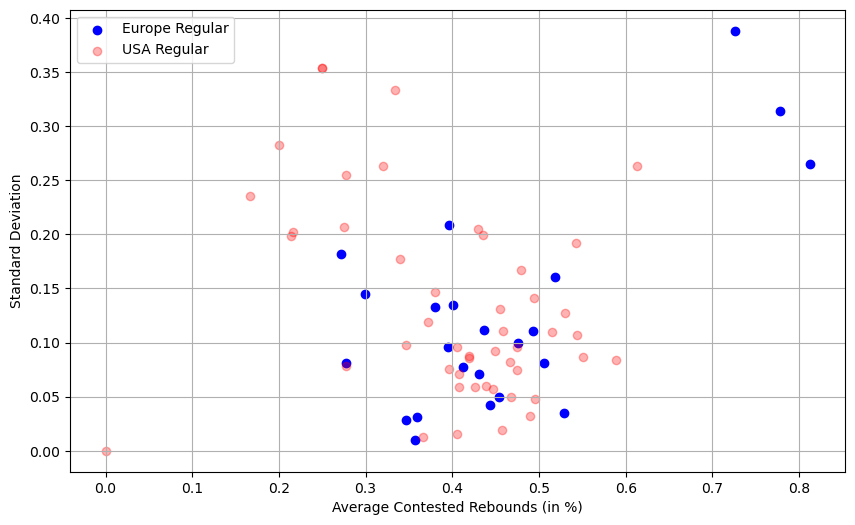

Standard Deviation for Europe: 0.12418983960389089
Standard Deviation for USA: 0.1332817157440881
Mean PRCT Contested for Europe: 0.490578835978836
Mean PRCT Contested for USA: 0.43814526862026865


In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean and standard deviation for FG3M/FGM for data_per_min_europe_regular
avg_fg3m_fgm_europe = europe_C_reb.groupby('PLAYER_ID')['REB_CONTEST_PCT'].agg(['mean', 'std'])

# Calculate mean and standard deviation for FG3M/FGM for data_per_min_usa_regular
avg_fg3m_fgm_usa = non_europe_C_reb.groupby('PLAYER_ID')['REB_CONTEST_PCT'].agg(['mean', 'std'])

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for data_per_min_europe_regular
plt.scatter(avg_fg3m_fgm_europe['mean'], avg_fg3m_fgm_europe['std'], label='Europe Regular', color='blue')

# Scatter plot for data_per_min_usa_regular
plt.scatter(avg_fg3m_fgm_usa['mean'], avg_fg3m_fgm_usa['std'], label='USA Regular', color='red', alpha=0.3)

# Add labels and title
plt.xlabel('Average Contested Rebounds (in %)')
plt.ylabel('Standard Deviation')
plt.title('')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


std_europe = avg_fg3m_fgm_europe['std'].mean()
std_usa = avg_fg3m_fgm_usa['std'].mean()

std_europe_m = avg_fg3m_fgm_europe['mean'].mean()
std_usa_m = avg_fg3m_fgm_usa['mean'].mean()

print("Standard Deviation for Europe:", std_europe)
print("Standard Deviation for USA:", std_usa)
print("Mean PRCT Contested for Europe:", std_europe_m)
print("Mean PRCT Contested for USA:", std_usa_m)

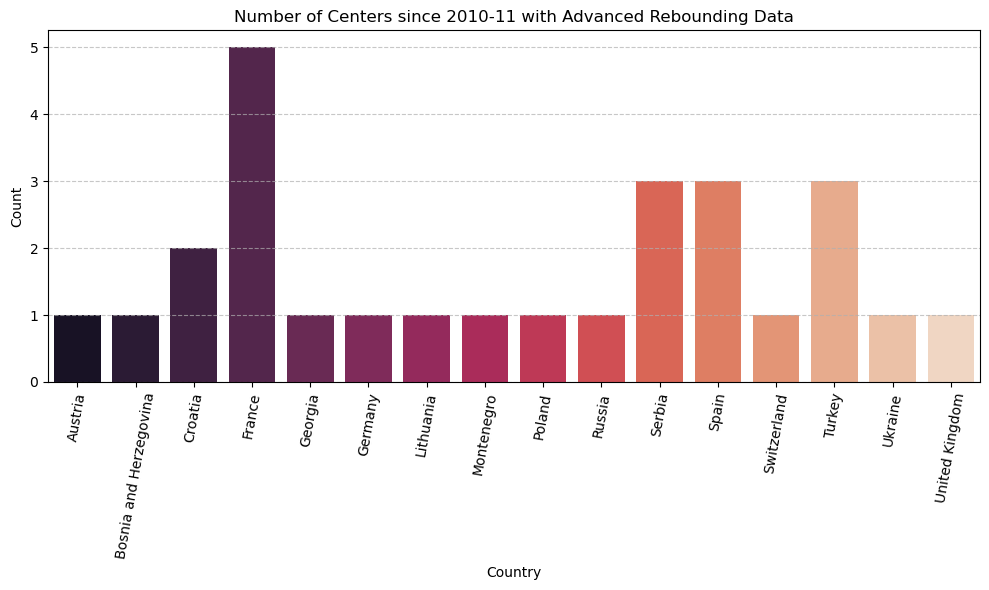

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Season count per country per player:
count_europe = europe_C_reb.groupby('COUNTRY')['PLAYER_NAME'].nunique().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='COUNTRY', y="PLAYER_NAME", data=count_europe, palette='rocket', linewidth=2)  # Create a count plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many countries

plt.title("Number of Centers since 2010-11 with Advanced Rebounding Data")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=80)  # Rotate x-axis labels
plt.ylim(ymin=0)        # Start y-axis at zero

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines with style

plt.tight_layout()  # Adjust spacing for better readability

plt.show()  # Display the plot

In [104]:
# Amount of players from those countries since 1996:
count_europe = europe_C_reb.groupby(['COUNTRY', 'PLAYER_NAME'])['PLAYER_NAME'].agg(['count']).reset_index()
count_europe

,COUNTRY,PLAYER_NAME,count
0,Austria,Jakob Poeltl,3
1,Bosnia and Herzegovina,Jusuf Nurkic,4
2,Croatia,Ante Zizic,1
3,Croatia,Ivica Zubac,4
4,France,Alexis Ajinca,1
5,France,Boris Diaw,4
6,France,Ian Mahinmi,4
7,France,Joffrey Lauvergne,2
8,France,Rudy Gobert,7
9,Georgia,Zaza Pachulia,5


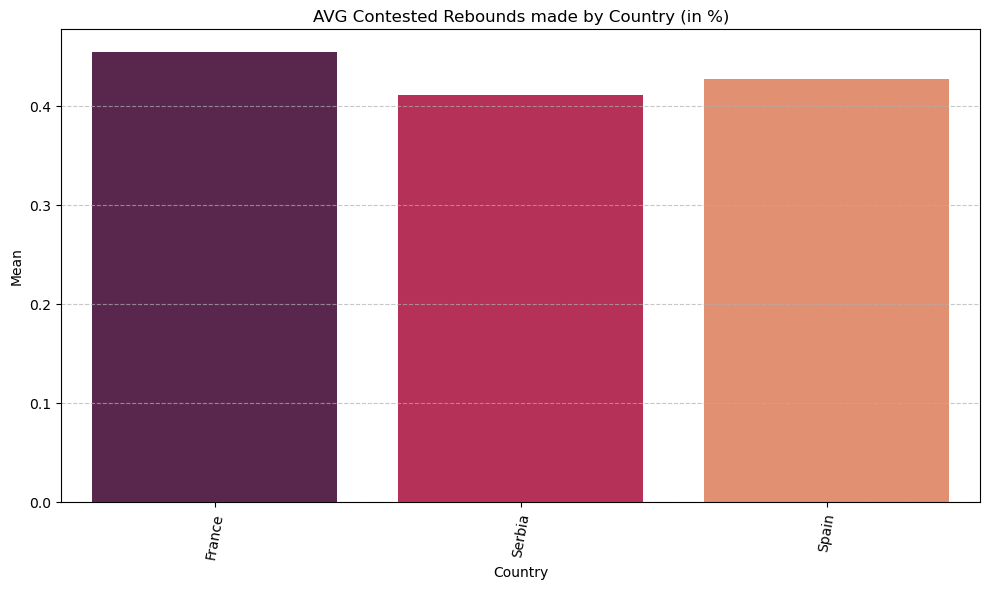

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for countries with at least 5 players before calculating means
filtered_europe_C_reb = europe_C_reb.groupby('COUNTRY').filter(lambda x: x['PLAYER_ID'].count() >= 10)

# Calculate mean contested rebounds per country on the filtered data
avg_cont_reb_europe = filtered_europe_C_reb.groupby('COUNTRY')['REB_CONTEST_PCT'].agg(['mean']).reset_index()

fig, ax = plt.subplots(figsize=(10, 6)) 

sns.barplot(x='COUNTRY', y='mean', data=avg_cont_reb_europe, palette='rocket', linewidth=2)  # Create a count plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many countries

plt.title("AVG Contested Rebounds made by Country (in %)")
plt.xlabel("Country")
plt.ylabel("Mean")
plt.xticks(rotation=80)  # Rotate x-axis labels
plt.ylim(ymin=0)        # Start y-axis at zero

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines with style

plt.tight_layout()  # Adjust spacing for better readability

plt.show()  # Display the plot

## Outcome:

* There are only 27 Centers from 16 countries represented since 2010-2011
* 12 out of 16 countries have only 1-2 unique players.
* The counts are seasons per country.
* When filtering out countries with 10 seasons or more we get disparity in amount of players:
    - France 5 players
    - Serbia 3 players
    - Spain 3 players

* It is difficult to compare and infer results on CONT/UNCONT rebounds from such small sample for European players. 